In [1]:
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [44]:
result_s = pickle.load(open('result_s.pkl', 'rb'))
result_l = pickle.load(open('result.pkl', 'rb'))
result_v2 = pickle.load(open('result_v2.pkl', 'rb'))

In [45]:
for i,each in enumerate(result_l['EVAL']):
    each = list(each)
    each[0],each[1] = each[1],each[0] 
    result_l['EVAL'][i] = each      

In [58]:
EVAL = result_s['EVAL']+result_l['EVAL']
k = result_s['K']+list(range(1100,3001,100))

In [52]:
EVAL = result_v2['EVAL']
k = result_v2['K']

In [59]:
recall = [each[0] for each in EVAL]
precision = [each[1] for each in EVAL]
accuracy = [each[2] for each in EVAL]
error_rate = [each[3] for each in EVAL]
F1 = [each[4] for each in EVAL]

In [62]:
EVAL[-1]

[0.7718794835007173, 0.5633507853403141, 0.616, 0.384, 0.6513317191283293]

Text(0.5,0,'vocab size')

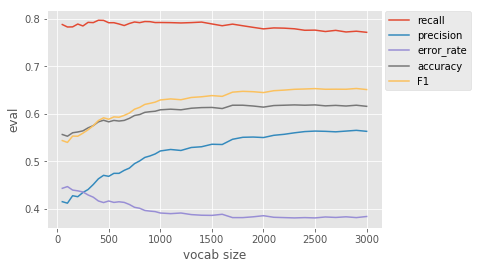

In [61]:
%matplotlib inline
plt.plot(k,recall,label='recall')

plt.plot(k,precision,label='precision')
plt.plot(k,error_rate,label='error_rate')

plt.plot(k,accuracy,label='accuracy')
plt.plot(k,F1,label='F1')
plt.legend(bbox_to_anchor=(1.01, 0.632), loc=3, borderaxespad=0)
plt.ylabel('eval')
plt.xlabel('vocab size')

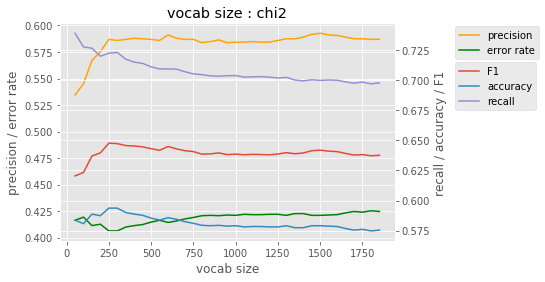

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(k,precision,label = 'precision',c='orange')
ax1.plot(k,error_rate,label = 'error rate',c='g')

ax1.set_ylabel('precision / error rate')
ax1.legend(bbox_to_anchor=(1.18, 0.835), loc=3, borderaxespad=0)
ax1.set_title('vocab size : chi2')
ax1.set_xlabel('vocab size')
ax2 = ax1.twinx()
ax2.plot(k,F1,label = 'F1')
ax2.plot(k,accuracy,label = 'accuracy')
ax2.plot(k,recall,label='recall')
ax2.set_ylabel('recall / accuracy / F1')
ax2.legend(bbox_to_anchor=(1.18, 0.6), loc=3, borderaxespad=0)

In [3]:
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
import matplotlib.pyplot as plt
import heapq

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
RF = pickle.load(open('RF.pkl', 'rb'))
LR = pickle.load(open('LR.pkl', 'rb'))
VOCAB = pickle.load(open('VOCAB.pkl', 'rb'))
VOCAB = {value:key for key,value in VOCAB.items()}

D:\Anaconda\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
D:\Anaconda\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
D:\Anaconda\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [18]:
len(VOCAB),type(VOCAB),VOCAB[200]

(112512, dict)

In [49]:
imp = list(RF.feature_importances_)
coef = LR.coef_
coef = list(coef[0])

In [72]:
K=40
f = lambda x: list(map(x.index, heapq.nlargest(K, x)))

In [73]:
index = f(imp)
value = [imp[each] for each in index]
word = [VOCAB[each] for each in index]
', '.join(word)

'几连板, 涨停, 制药, 早盘, 涨, 开板, 控股, 涨价, 拉升, 电气设备, 轻工, 拟, 跌, 联社, 面上, 逾, 财, 文章内容, 触发, 资金, 有色, 成为, 控制, 报道, 涨幅, 锂电池, 认为, 公司, 日讯, 业务, 封, 大涨, 相关, 指涨, 今年, 证券, 五连板, 其中, 动力, 证券化'

In [68]:
index = f(coef)
value = [coef[each] for each in index]
word = [VOCAB[each] for each in index]
', '.join(word)

'向下, 涉嫌, 跌, 大跌, 试点, 电瓷, 触发, 跳水, 千亿元, 运行, 重挫, 信用, 阴线, 补贴, 调查, 投资收益, 营收, 较强, 不算, 短期'

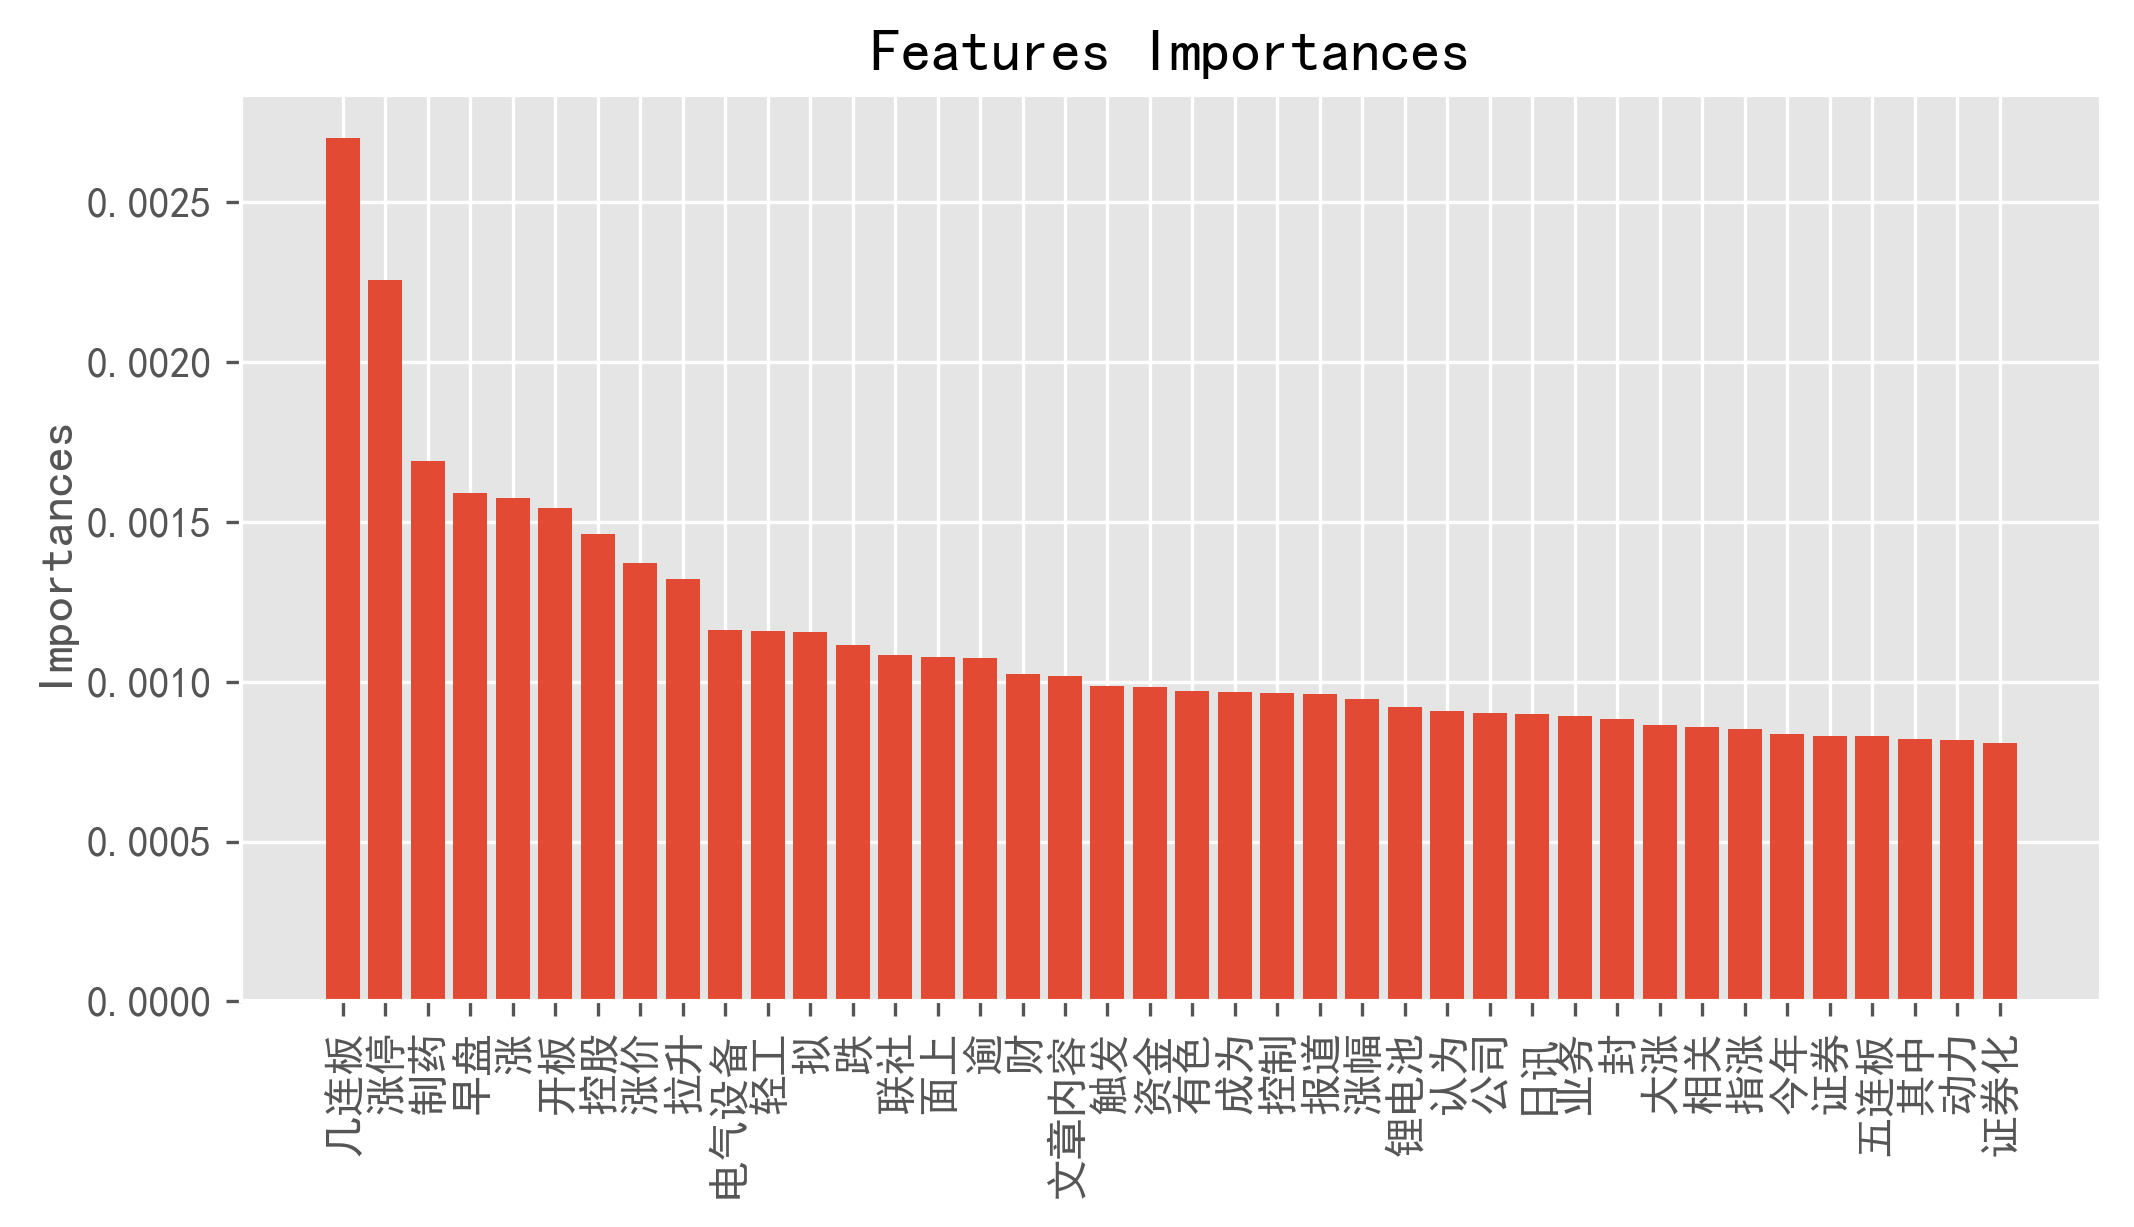

In [76]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.bar(range(len(value)), value)
plt.ylabel('Importances')
plt.title('Features Importances')
plt.xticks(range(len(value)),word,rotation=90)
plt.show()